In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# DataSet 7

In [65]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book7.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,3312,RAYALSEEMA,1901,7.0,50.2,0.0,12.1,38.9,53.0,73.4,60.3,109.0,81.6,137.2,91.3,714.0,57.2,51.0,295.6,310.1
1,3313,RAYALSEEMA,1902,10.0,0.2,1.7,11.0,36.8,73.6,41.3,148.3,181.7,188.5,88.9,36.4,818.4,10.1,49.6,444.9,313.8
2,3314,RAYALSEEMA,1903,30.0,0.1,0.0,3.6,80.5,67.5,127.5,140.6,219.7,95.3,289.4,84.0,1138.2,30.1,84.1,555.3,468.7
3,3315,RAYALSEEMA,1904,14.8,0.0,1.7,7.1,58.8,39.8,75.1,19.4,84.7,111.5,4.4,16.1,433.4,14.8,67.6,219.0,132.0
4,3316,RAYALSEEMA,1905,6.5,6.8,17.0,18.3,44.2,66.1,50.9,219.3,36.5,180.2,55.4,2.0,703.4,13.3,79.6,372.9,237.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3422,RAYALSEEMA,2011,0.8,12.1,0.0,34.6,33.0,44.5,128.9,163.6,71.2,107.5,106.9,35.1,738.0,12.8,67.6,408.2,249.4
111,3423,RAYALSEEMA,2012,2.7,0.0,2.5,32.7,38.8,47.0,139.7,120.0,69.5,113.7,86.6,61.9,715.0,2.7,74.0,376.2,262.1
112,3424,RAYALSEEMA,2013,1.3,30.6,11.5,26.8,38.9,73.8,95.7,110.3,163.2,169.3,38.6,2.6,762.6,31.9,77.3,443.0,210.5
113,3425,RAYALSEEMA,2014,0.2,0.7,12.5,5.1,46.7,66.3,68.7,115.1,81.4,104.6,37.8,12.8,551.8,0.9,64.2,331.5,155.2


In [66]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

In [67]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,3312,RAYALSEEMA,1901,7.0,50.2,0.0,12.1,38.9,53.0,73.4,60.3,109.0,81.6,137.2,91.3,714.0,57.2,51.0,295.6,310.1
1,3313,RAYALSEEMA,1902,10.0,0.2,1.7,11.0,36.8,73.6,41.3,148.3,181.7,188.5,88.9,36.4,818.4,10.1,49.6,444.9,313.8
2,3314,RAYALSEEMA,1903,30.0,0.1,0.0,3.6,80.5,67.5,127.5,140.6,219.7,95.3,289.4,84.0,1138.2,30.1,84.1,555.3,468.7
3,3315,RAYALSEEMA,1904,14.8,0.0,1.7,7.1,58.8,39.8,75.1,19.4,84.7,111.5,4.4,16.1,433.4,14.8,67.6,219.0,132.0
4,3316,RAYALSEEMA,1905,6.5,6.8,17.0,18.3,44.2,66.1,50.9,219.3,36.5,180.2,55.4,2.0,703.4,13.3,79.6,372.9,237.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3422,RAYALSEEMA,2011,0.8,12.1,0.0,34.6,33.0,44.5,128.9,163.6,71.2,107.5,106.9,35.1,738.0,12.8,67.6,408.2,249.4
111,3423,RAYALSEEMA,2012,2.7,0.0,2.5,32.7,38.8,47.0,139.7,120.0,69.5,113.7,86.6,61.9,715.0,2.7,74.0,376.2,262.1
112,3424,RAYALSEEMA,2013,1.3,30.6,11.5,26.8,38.9,73.8,95.7,110.3,163.2,169.3,38.6,2.6,762.6,31.9,77.3,443.0,210.5
113,3425,RAYALSEEMA,2014,0.2,0.7,12.5,5.1,46.7,66.3,68.7,115.1,81.4,104.6,37.8,12.8,551.8,0.9,64.2,331.5,155.2


<AxesSubplot:>

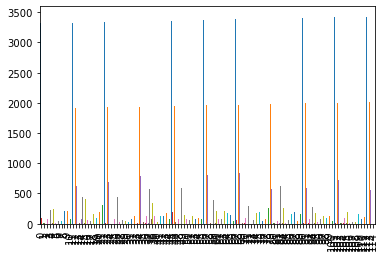

In [68]:
b.plot.bar(legend=None)

<AxesSubplot:>

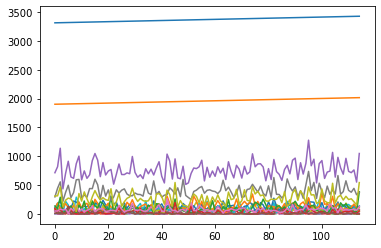

In [69]:
b.plot.line(legend=None)

<AxesSubplot:>

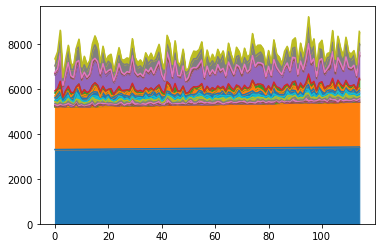

In [70]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

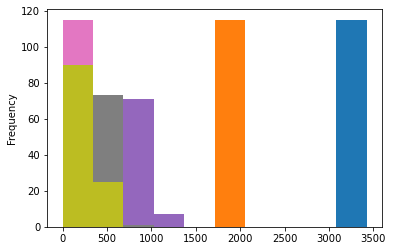

In [71]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='YEAR'>

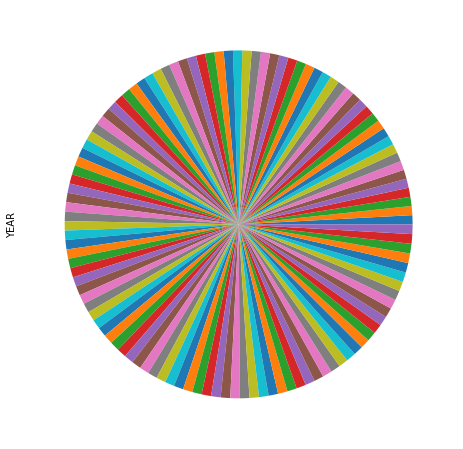

In [72]:
b.plot.pie(y='YEAR',figsize=(8,8),labels=None,legend=None)

# DataSet 8

In [73]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book8.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,3197,TELANGANA,1901,6.9,41.8,7.8,45.2,22.0,123.6,237.8,177.2,77.7,75.5,12.2,0.0,827.7,48.7,75.0,616.4,87.7
1,3198,TELANGANA,1902,0.0,0.0,0.2,10.7,7.3,52.4,146.3,142.8,190.5,41.7,31.2,7.3,630.4,0.0,18.2,532.0,80.2
2,3199,TELANGANA,1903,12.9,4.6,0.0,9.9,40.7,99.2,505.2,246.7,191.9,155.8,15.5,1.1,1283.4,17.5,50.5,1042.9,172.4
3,3200,TELANGANA,1904,0.0,0.0,10.8,0.8,14.7,104.2,139.5,50.0,162.3,44.4,0.0,0.0,526.7,0.0,26.3,456.0,44.4
4,3201,TELANGANA,1905,0.0,4.3,12.8,27.6,32.2,129.5,82.4,237.3,179.1,19.6,0.0,0.0,724.9,4.3,72.6,628.4,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3307,TELANGANA,2011,0.0,11.9,2.6,25.6,9.3,83.9,268.2,225.9,107.6,13.9,4.2,0.0,753.1,11.9,37.4,685.6,18.1
111,3308,TELANGANA,2012,6.7,0.0,0.2,14.0,8.4,124.4,300.3,229.9,202.4,83.6,38.7,0.0,1008.6,6.7,22.6,857.0,122.3
112,3309,TELANGANA,2013,2.4,29.0,0.2,24.4,8.5,213.4,453.8,230.6,161.4,205.9,16.4,2.7,1348.7,31.4,33.0,1059.2,225.0
113,3310,TELANGANA,2014,0.2,2.9,58.3,10.3,73.3,62.3,146.0,205.2,146.8,29.6,10.8,0.7,746.4,3.1,141.9,560.2,41.0


In [74]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

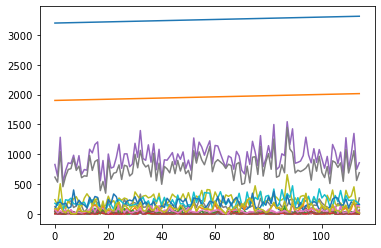

In [75]:
a.plot.line(legend=None)

<AxesSubplot:>

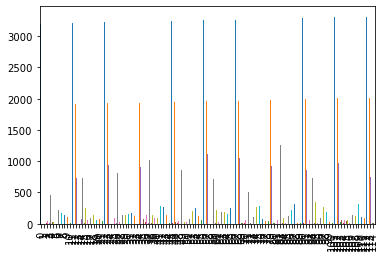

In [76]:
a.plot.bar(legend=None)

<AxesSubplot:>

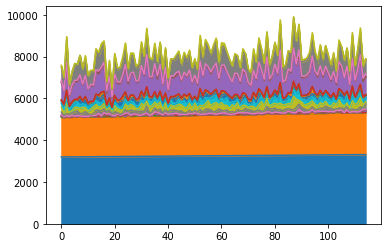

In [77]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

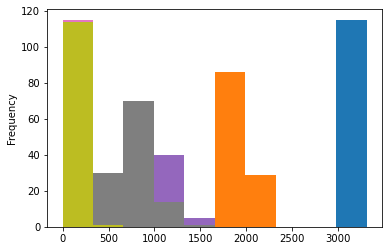

In [78]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAY'>

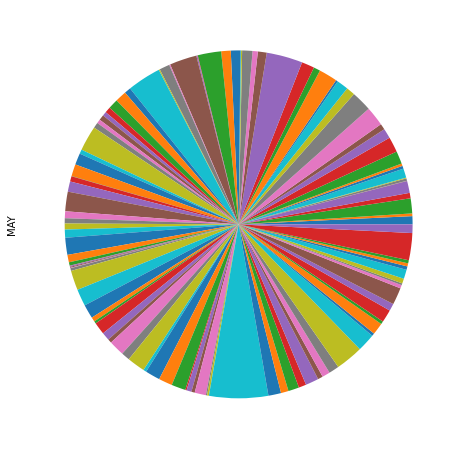

In [79]:
a.plot.pie(y='MAY',figsize=(8,8),labels=None,legend=None)

# DataSet 9

In [80]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book9.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,3082,COASTAL ANDHRA PRADESH,1901,18.8,80.9,7.2,28.7,68.7,77.7,113.0,133.7,125.3,173.4,164.8,1.5,993.8,99.7,104.6,449.7,339.8
1,3083,COASTAL ANDHRA PRADESH,1902,2.0,0.0,2.8,23.9,37.6,72.6,144.5,236.1,204.5,262.0,50.4,27.1,1063.6,2.0,64.4,657.7,339.5
2,3084,COASTAL ANDHRA PRADESH,1903,0.8,13.3,0.2,6.2,73.4,154.0,248.6,258.0,216.5,159.1,173.9,12.1,1316.2,14.2,79.8,877.1,345.1
3,3085,COASTAL ANDHRA PRADESH,1904,1.3,0.0,5.4,3.0,136.3,107.8,120.2,117.7,116.8,240.9,0.0,10.7,860.2,1.3,144.7,462.6,251.6
4,3086,COASTAL ANDHRA PRADESH,1905,1.1,16.7,68.0,37.0,68.8,84.4,64.6,210.8,170.2,66.0,7.4,0.0,795.2,17.8,173.8,530.1,73.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3192,COASTAL ANDHRA PRADESH,2011,0.0,17.9,0.9,62.3,67.9,86.8,196.0,215.8,129.7,74.6,4.9,5.0,861.9,17.9,131.2,628.4,84.4
111,3193,COASTAL ANDHRA PRADESH,2012,37.6,0.0,2.7,24.0,39.3,95.4,221.9,221.2,246.5,140.0,289.7,0.0,1318.4,37.6,66.1,785.0,429.7
112,3194,COASTAL ANDHRA PRADESH,2013,2.0,29.6,0.2,48.0,28.2,127.5,162.4,123.1,132.0,411.5,53.1,2.8,1120.5,31.7,76.4,545.0,467.4
113,3195,COASTAL ANDHRA PRADESH,2014,0.4,1.2,9.1,6.0,112.9,45.7,151.8,177.8,144.5,195.6,23.7,6.4,874.9,1.5,128.0,519.7,225.7


In [81]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

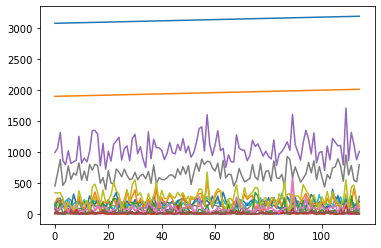

In [82]:
a.plot.line(legend=None)

<AxesSubplot:>

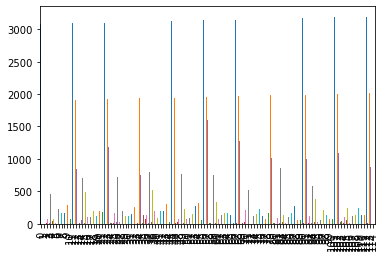

In [83]:
a.plot.bar(legend=None)

<AxesSubplot:>

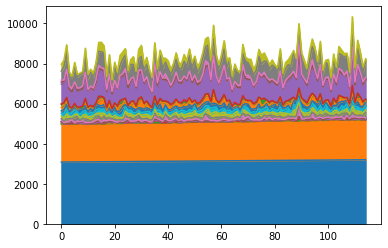

In [84]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

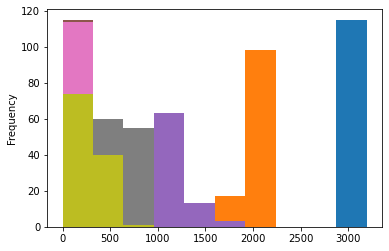

In [85]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='FEB'>

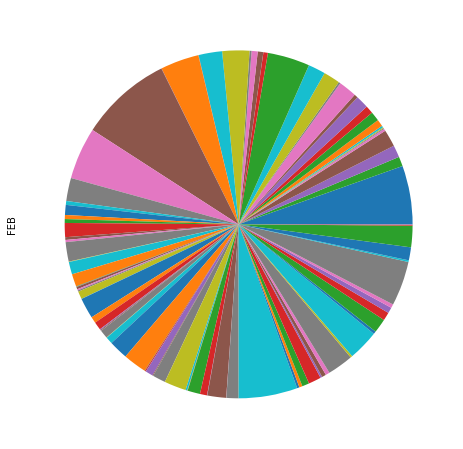

In [86]:
a.plot.pie(y='FEB',figsize=(8,8),labels=None,legend=None)

# DataSet 10

In [87]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book10.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2967,CHHATTISGARH,1901,48.9,116.5,27.8,5.5,18.4,101.6,381.0,476.7,182.8,27.3,0.4,0.0,1387.0,165.4,51.7,1142.2,27.7
1,2968,CHHATTISGARH,1902,0.6,6.5,0.4,13.9,10.3,37.2,403.8,236.6,198.1,4.7,8.1,3.7,923.9,7.1,24.6,875.7,16.5
2,2969,CHHATTISGARH,1903,6.2,13.9,0.4,6.8,51.1,110.7,365.9,396.0,212.0,168.0,0.1,0.0,1331.2,20.1,58.3,1084.7,168.1
3,2970,CHHATTISGARH,1904,0.0,8.6,32.3,0.2,77.5,369.5,303.6,483.6,86.8,129.3,1.0,0.0,1492.4,8.6,110.0,1243.5,130.4
4,2971,CHHATTISGARH,1905,50.3,22.6,19.0,24.6,31.8,40.4,443.7,270.8,338.8,8.9,0.0,0.0,1251.1,72.9,75.5,1093.8,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3077,CHHATTISGARH,2011,0.3,11.5,2.6,35.0,16.8,183.5,272.6,379.8,382.2,15.5,0.0,2.8,1302.7,11.8,54.4,1218.2,18.3
111,3078,CHHATTISGARH,2012,36.6,4.8,1.1,14.9,9.4,147.3,430.6,442.2,245.3,19.8,20.4,5.0,1377.4,41.5,25.4,1265.4,45.1
112,3079,CHHATTISGARH,2013,2.8,19.7,4.9,45.8,5.7,263.6,418.8,336.6,140.9,180.9,0.3,0.0,1420.0,22.5,56.4,1159.9,181.2
113,3080,CHHATTISGARH,2014,2.3,29.0,21.4,17.3,25.0,104.9,416.7,327.7,252.7,77.9,2.6,1.1,1278.7,31.3,63.7,1102.1,81.6


In [88]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

In [89]:
b=a.fillna(method='ffill')
b

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2967,CHHATTISGARH,1901,48.9,116.5,27.8,5.5,18.4,101.6,381.0,476.7,182.8,27.3,0.4,0.0,1387.0,165.4,51.7,1142.2,27.7
1,2968,CHHATTISGARH,1902,0.6,6.5,0.4,13.9,10.3,37.2,403.8,236.6,198.1,4.7,8.1,3.7,923.9,7.1,24.6,875.7,16.5
2,2969,CHHATTISGARH,1903,6.2,13.9,0.4,6.8,51.1,110.7,365.9,396.0,212.0,168.0,0.1,0.0,1331.2,20.1,58.3,1084.7,168.1
3,2970,CHHATTISGARH,1904,0.0,8.6,32.3,0.2,77.5,369.5,303.6,483.6,86.8,129.3,1.0,0.0,1492.4,8.6,110.0,1243.5,130.4
4,2971,CHHATTISGARH,1905,50.3,22.6,19.0,24.6,31.8,40.4,443.7,270.8,338.8,8.9,0.0,0.0,1251.1,72.9,75.5,1093.8,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,3077,CHHATTISGARH,2011,0.3,11.5,2.6,35.0,16.8,183.5,272.6,379.8,382.2,15.5,0.0,2.8,1302.7,11.8,54.4,1218.2,18.3
111,3078,CHHATTISGARH,2012,36.6,4.8,1.1,14.9,9.4,147.3,430.6,442.2,245.3,19.8,20.4,5.0,1377.4,41.5,25.4,1265.4,45.1
112,3079,CHHATTISGARH,2013,2.8,19.7,4.9,45.8,5.7,263.6,418.8,336.6,140.9,180.9,0.3,0.0,1420.0,22.5,56.4,1159.9,181.2
113,3080,CHHATTISGARH,2014,2.3,29.0,21.4,17.3,25.0,104.9,416.7,327.7,252.7,77.9,2.6,1.1,1278.7,31.3,63.7,1102.1,81.6


<AxesSubplot:>

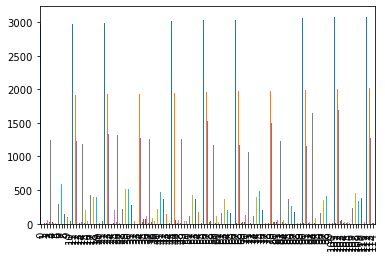

In [90]:
b.plot.bar(legend=None)

<AxesSubplot:>

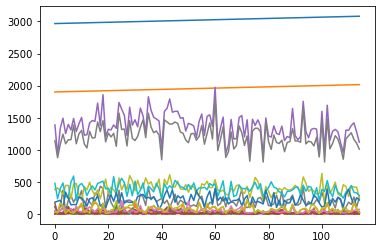

In [91]:
b.plot.line(legend=None)

<AxesSubplot:>

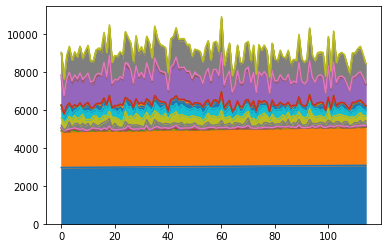

In [92]:
b.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

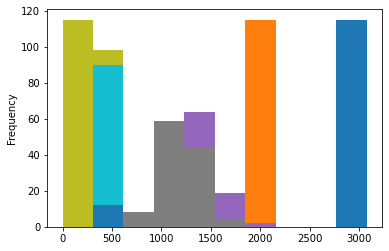

In [93]:
b.plot.hist(legend=None)

<AxesSubplot:ylabel='JUL'>

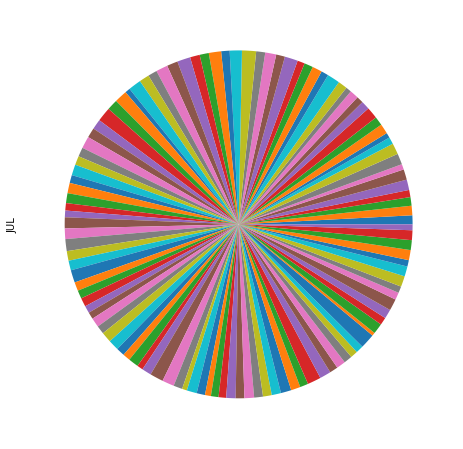

In [94]:
b.plot.pie(y='JUL',figsize=(8,8),labels=None,legend=None)

# DataSet 11

In [95]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book11.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2852,VIDARBHA,1901,36.8,39.9,30.9,26.1,7.3,129.7,295.3,368.8,123.4,35.2,0.0,0.0,1093.3,76.6,64.3,917.2,35.2
1,2853,VIDARBHA,1902,1.6,0.1,0.0,6.5,4.1,38.0,270.7,204.7,150.9,29.6,16.1,26.7,748.9,1.7,10.6,664.3,72.4
2,2854,VIDARBHA,1903,5.2,4.0,0.1,2.5,37.8,121.2,475.5,325.5,154.8,100.8,2.0,0.0,1229.4,9.3,40.3,1077.0,102.8
3,2855,VIDARBHA,1904,4.3,2.4,12.9,0.2,14.8,148.9,158.3,151.8,196.9,61.7,0.0,0.9,753.2,6.7,27.9,655.9,62.7
4,2856,VIDARBHA,1905,7.3,12.7,12.4,16.2,14.0,81.0,254.5,216.3,321.3,6.0,0.2,0.0,941.8,20.0,42.6,873.1,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2962,VIDARBHA,2011,0.0,1.2,0.1,7.7,0.6,137.9,247.1,302.8,191.0,4.7,0.0,0.0,893.2,1.2,8.4,878.8,4.7
111,2963,VIDARBHA,2012,3.1,0.1,0.0,0.6,0.2,125.5,370.5,316.2,249.4,34.9,7.3,0.0,1107.7,3.2,0.8,1061.5,42.2
112,2964,VIDARBHA,2013,6.6,13.0,3.8,2.8,0.5,366.7,535.5,326.1,131.7,133.5,0.0,0.0,1520.0,19.6,7.0,1360.0,133.5
113,2965,VIDARBHA,2014,1.2,18.3,49.6,2.6,4.0,63.3,337.6,191.7,224.9,17.3,6.2,2.3,919.1,19.5,56.3,817.5,25.8


In [96]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

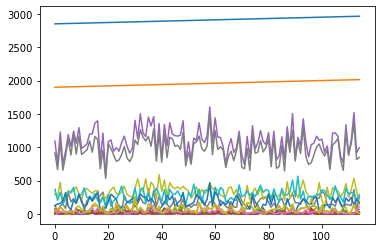

In [97]:
a.plot.line(legend=None)

<AxesSubplot:>

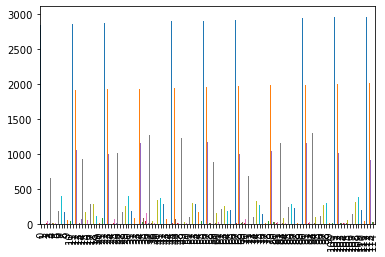

In [98]:
a.plot.bar(legend=None)

<AxesSubplot:>

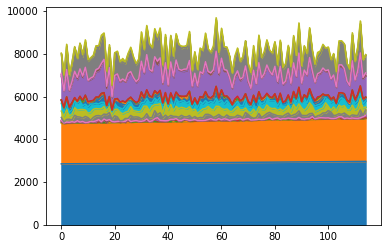

In [99]:
a.plot.area(legend=None)

<AxesSubplot:ylabel='Frequency'>

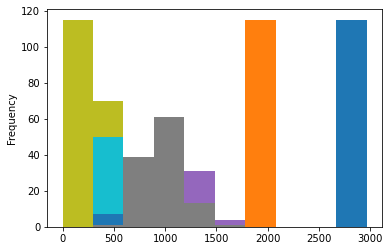

In [100]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='MAR'>

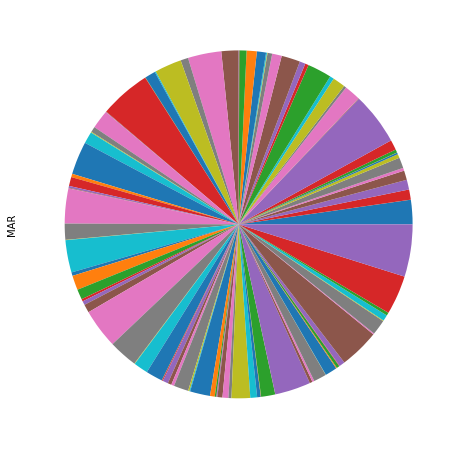

In [101]:
a.plot.pie(y='MAR',figsize=(8,8),labels=None,legend=None)

# DataSet 12

In [102]:
a=pd.read_csv(r"C:\Users\user\Downloads\New folder\Book12.csv")
a

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,2737,MATATHWADA,1901,15.8,3.3,32.1,48.5,26.5,193.1,184.1,249.8,74.0,81.6,0.0,0.0,908.7,19.1,107.1,700.9,81.6
1,2738,MATATHWADA,1902,1.3,0.0,0.4,7.2,0.8,52.4,120.9,85.2,273.3,61.3,84.4,56.9,744.1,1.3,8.4,531.8,202.7
2,2739,MATATHWADA,1903,2.6,0.8,0.0,1.7,58.3,104.4,264.2,281.9,173.3,139.9,0.3,5.3,1032.6,3.4,60.0,823.8,145.4
3,2740,MATATHWADA,1904,0.0,0.9,12.1,0.3,7.2,79.2,118.4,57.3,339.0,76.2,0.0,0.0,690.5,0.9,19.5,593.9,76.2
4,2741,MATATHWADA,1905,1.3,2.0,0.0,6.6,4.8,84.6,94.8,137.6,157.8,15.4,0.9,0.0,505.9,3.3,11.4,474.8,16.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2847,MATATHWADA,2011,0.0,3.8,0.7,3.5,3.1,79.2,230.1,228.5,90.0,24.8,0.0,0.0,663.5,3.8,7.3,627.7,24.8
111,2848,MATATHWADA,2012,0.0,0.0,0.0,0.6,2.3,72.2,161.1,101.4,120.0,68.8,0.3,0.0,526.7,0.0,2.9,454.7,69.1
112,2849,MATATHWADA,2013,1.5,9.4,2.6,7.9,6.4,160.9,293.4,136.9,154.1,94.3,7.4,13.1,888.0,10.9,16.9,745.3,114.8
113,2850,MATATHWADA,2014,1.4,13.4,79.0,11.9,7.0,30.4,105.0,178.9,84.5,14.2,19.9,3.3,548.9,14.8,97.9,398.8,37.4


In [103]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        115 non-null    int64  
 1   SUBDIVISION  115 non-null    object 
 2   YEAR         115 non-null    int64  
 3   JAN          115 non-null    float64
 4   FEB          115 non-null    float64
 5   MAR          115 non-null    float64
 6   APR          115 non-null    float64
 7   MAY          115 non-null    float64
 8   JUN          115 non-null    float64
 9   JUL          115 non-null    float64
 10  AUG          115 non-null    float64
 11  SEP          115 non-null    float64
 12  OCT          115 non-null    float64
 13  NOV          115 non-null    float64
 14  DEC          115 non-null    float64
 15  ANNUAL       115 non-null    float64
 16  Jan-Feb      115 non-null    float64
 17  Mar-May      115 non-null    float64
 18  Jun-Sep      115 non-null    float64
 19  Oct-Dec 

<AxesSubplot:>

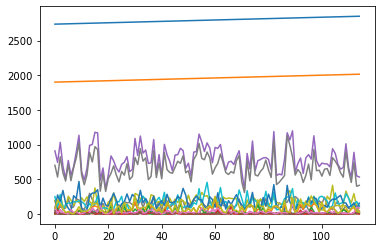

In [104]:
a.plot.line(legend=None)

<AxesSubplot:>

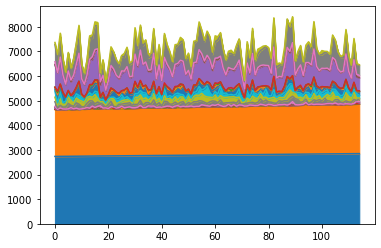

In [105]:
a.plot.area(legend=None)

<AxesSubplot:>

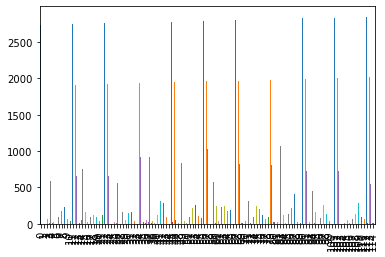

In [106]:
a.plot.bar(legend=None)

<AxesSubplot:ylabel='Frequency'>

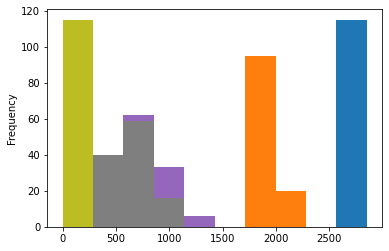

In [107]:
a.plot.hist(legend=None)

<AxesSubplot:ylabel='DEC'>

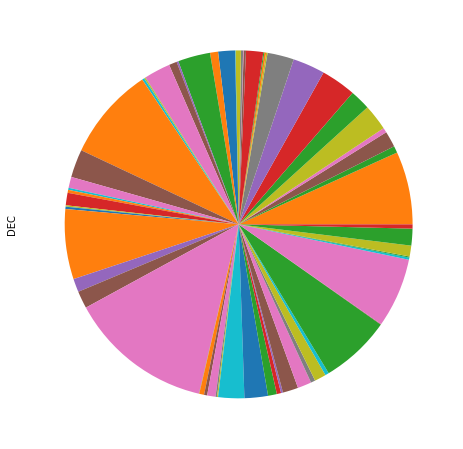

In [108]:
a.plot.pie(y='DEC',figsize=(8,8),labels=None,legend=None)